In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
years = ['1990', '1995', '2000', '2005', '2010', '2015', '2018', '2019', '2020']

In [5]:
temp['date'] = pd.to_datetime(temp['dt'])

In [6]:
temp['year'] = temp['date'].dt.year
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01,1743
1,1743-12-01,NaN,NaN,Åland,1743-12-01,1743
2,1744-01-01,NaN,NaN,Åland,1744-01-01,1744
3,1744-02-01,NaN,NaN,Åland,1744-02-01,1744
4,1744-03-01,NaN,NaN,Åland,1744-03-01,1744
...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01,2013
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01,2013
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01,2013
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01,2013


In [7]:
temp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
date                                 0
year                                 0
dtype: int64

In [8]:
len(temp)

577462

In [9]:
data = temp.dropna()

In [10]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01,1743
5,1744-04-01,1.530,4.680,Åland,1744-04-01,1744
6,1744-05-01,6.702,1.789,Åland,1744-05-01,1744
7,1744-06-01,11.609,1.577,Åland,1744-06-01,1744
8,1744-07-01,15.342,1.410,Åland,1744-07-01,1744


In [11]:
df = data[['year', 'AverageTemperature', 'Country']]

In [12]:
df

,year,AverageTemperature,Country
0,1743,4.384,Åland
5,1744,1.530,Åland
6,1744,6.702,Åland
7,1744,11.609,Åland
8,1744,15.342,Åland
...,...,...,...
577456,2013,21.142,Zimbabwe
577457,2013,19.059,Zimbabwe
577458,2013,17.613,Zimbabwe
577459,2013,17.000,Zimbabwe


In [13]:
df1 = df[df['year']>1969]

In [14]:
final_df = df1.groupby(['year', 'Country'])['AverageTemperature'].mean().reset_index()

In [15]:
final_df = df1.groupby(['year', 'Country'])['AverageTemperature'].agg(['mean','median', 'max', 'min', 'var']).reset_index()
final_df

,year,Country,mean,median,max,min,var
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117
1,1970,Africa,24.321583,25.0370,25.910,20.988,2.772779
2,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893
3,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106
4,1970,American Samoa,26.760667,26.8540,27.678,25.896,0.406978
...,...,...,...,...,...,...,...
10643,2013,Western Sahara,23.744250,24.2745,28.564,17.461,16.122841
10644,2013,Yemen,28.129750,30.0215,32.325,21.567,16.993068
10645,2013,Zambia,21.196000,21.2985,23.636,18.266,4.310316
10646,2013,Zimbabwe,20.710750,20.4505,24.075,17.000,7.778317


## CO2 emission 

In [16]:
co2 = pd.read_excel('ghg.xls', sheet_name = 'fossil_CO2_totals_by_country')
co2_pivot = pd.melt(co2, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018,      2019,      2020], var_name = 'year', value_name = 'emission')
co2_data =  pd.merge(final_df, co2_pivot, on = ['Country', 'year'], how="inner")
co2_data = co2_data.rename(columns = {'mean':'mean_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
co2_data.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.718206
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,4.813550
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,18.931573
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,8.952568
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.002168


In [17]:
co2_data.columns

Index(['year', 'Country', 'mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'emission'],
      dtype='object')

In [18]:
co2_data.to_csv('co2_emission.csv')

## Co2 emission per sector 

In [19]:
co2_by_sec = pd.read_excel('ghg.xls', sheet_name = 'fossil_CO2_by_sector_and_countr')
co2_by_sec =pd.melt(co2_by_sec, id_vars = ['Sector','Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018,      2019,      2020], var_name = 'year', value_name = 'emission')
co2_by_sector_df = pd.merge(final_df, co2_by_sec, on = ['Country', 'year'], how="inner")
co2_by_sector_df = co2_by_sector_df.rename(columns = {'mean':'mean_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
co2_by_sector_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,Sector,emission
0,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Power Industry,0.055674
1,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Buildings,0.789134
2,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Transport,0.228480
3,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other industrial combustion,0.102457
4,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other sectors,0.542460


In [20]:
co2_by_sector_df.columns

Index(['year', 'Country', 'mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'Sector', 'emission'],
      dtype='object')

In [21]:
co2_by_sector_df.to_csv('co2_emission_per_sector.csv')

## Co2_emission_per_captia

In [22]:
co2_per_captia = pd.read_excel('ghg.xls', sheet_name = 'fossil_CO2_per_capita_by_countr')
co2_by_captia =pd.melt(co2_per_captia, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018,      2019,      2020], var_name = 'year', value_name = 'emission')
co2_per_captia_df = pd.merge(final_df, co2_by_captia, on = ['Country', 'year'], how="inner")
co2_per_captia_df = co2_per_captia_df.rename(columns = {'mean':'mean_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
co2_per_captia_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,0.154430
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,2.238236
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,1.301139
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,1.321143
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.338637


In [23]:
co2_per_captia_df.columns

Index(['year', 'Country', 'mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'emission'],
      dtype='object')

In [24]:
co2_per_captia_df.to_csv('co2_emission_per_captia.csv')

## Total Green House Gas Emissions per Country

In [25]:
ghg_total = pd.read_excel('ghg.xls', sheet_name = 'GHG_totals_by_country')
ghg_total =pd.melt(ghg_total, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018], var_name = 'year', value_name = 'emission')
ghg_total_df = pd.merge(final_df, ghg_total, on = ['Country', 'year'], how="inner")
ghg_total_df = ghg_total_df.rename(columns = {'mean':'mean_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
ghg_total_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,16.269661
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,7.942808
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,51.542009
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,18.985437
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.004399


In [26]:
ghg_total_df.columns

Index(['year', 'Country', 'mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'emission'],
      dtype='object')

In [27]:
ghg_total_df.to_csv('ghg_emissions.csv')

## Green House Gas Emission Per Sector

In [28]:
ghg_per_sec = pd.read_excel('ghg.xls', sheet_name = 'GHG_by_sector_and_country')
ghg_per_sec =pd.melt(ghg_per_sec, id_vars = ['Sector', 'Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018], var_name = 'year', value_name = 'emission')
ghg_per_sec_df = pd.merge(final_df, ghg_per_sec, on = ['Country', 'year'], how="inner")
ghg_per_sec_df = ghg_per_sec_df.rename(columns = {'mean':'mean_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
ghg_per_sec_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,Sector,emission
0,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Power Industry,0.055825
1,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Buildings,0.816874
2,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Transport,0.234186
3,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other industrial combustion,0.102993
4,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other sectors,15.059782


In [29]:
ghg_per_sec_df.columns

Index(['year', 'Country', 'mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'Sector', 'emission'],
      dtype='object')

In [30]:
ghg_per_sec_df.to_csv('ghg_emission_per_sector.csv')

## Green House Gas Emission per Captia

In [31]:
ghg_per_captia = pd.read_excel('ghg.xls', sheet_name = 'GHG_per_capita_by_country')
ghg_per_captia = pd.melt(ghg_per_captia, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018], var_name = 'year', value_name = 'emission')
ghg_per_captia_df = pd.merge(final_df, ghg_per_captia, on = ['Country', 'year'], how="inner")
ghg_per_captia_df = ghg_per_captia_df.rename(columns = {'mean':'mean_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
ghg_per_captia_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.462297
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,3.693299
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,3.542406
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,2.801708
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.686986


In [32]:
ghg_per_captia_df.columns

Index(['year', 'Country', 'mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'emission'],
      dtype='object')

In [33]:
ghg_per_captia_df.to_csv('ghg_per_captia.csv')

### CO2 Emission Analysis

In [34]:
#inspecting the data
co2_data.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.718206
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,4.813550
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,18.931573
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,8.952568
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.002168
...,...,...,...,...,...,...,...,...
7563,2013,Vietnam,25.232125,26.4565,27.623,19.885,7.767071,162.875168
7564,2013,Western Sahara,23.744250,24.2745,28.564,17.461,16.122841,0.237976
7565,2013,Yemen,28.129750,30.0215,32.325,21.567,16.993068,28.763867
7566,2013,Zambia,21.196000,21.2985,23.636,18.266,4.310316,3.879331


In [35]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

In [39]:
# Creating a copy of dataframe
df_c = co2_data.copy()

#### Removing outliers 

In [53]:
num_feat = ['mean_temp', 'median_temp', 'max_temp', 'min',
       'variance_temp', 'emission']

In [54]:
for i in num_feat:
  indeces = []                                              # creating a empty list
  x = df_c[i]
  mean = df_c[i].mean()
  std = df_c[i].std()
  index = df_c[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)

In [55]:
indeces

[Int64Index([ 163,  335,  507,  679,  851, 1023, 1195, 1367, 1539, 1679, 1711,
             1851, 1883, 2023, 2055, 2195, 2227, 2367, 2399, 2442, 2539, 2571,
             2614, 2711, 2743, 2786, 2883, 2915, 2958, 3055, 3087, 3130, 3227,
             3259, 3302, 3399, 3431, 3474, 3571, 3603, 3646, 3743, 3775, 3818,
             3915, 3947, 3990, 4087, 4119, 4162, 4291, 4334, 4463, 4506, 4635,
             4678, 4807, 4850, 4979, 5022, 5151, 5194, 5323, 5366, 5495, 5538,
             5667, 5710, 5839, 5882, 6011, 6054, 6183, 6226, 6355, 6398, 6527,
             6570, 6699, 6742, 6871, 6914, 7043, 7086, 7126, 7215, 7258, 7298,
             7387, 7430, 7470, 7559],
            dtype='int64')]

In [56]:
df_c.drop(list(indeces)[0] , inplace = True)

In [88]:
import warnings
warnings.filterwarnings('ignore')

## Descriptive Statistics

In [91]:
def desc_stats(data, feature):
    df = data[feature].describe()
    print(f'Descriptive Statistics of {feature}')
    return df.reset_index()
    

In [93]:
def dist_plots(data, feature):
    sns.distplot(data[feature])
    plt.title(f'Distribution plot of {feature}')
    plt.show()

In [97]:
desc_stats(df_c, 'variance_temp')

Descriptive Statistics of variance_temp


,index,variance_temp
0,count,7476.000000
1,mean,31.595300
2,std,42.467378
3,min,0.022092
4,25%,1.385950
5,50%,11.630805
6,75%,52.855942
7,max,295.247774


In [98]:
desc_stats(df_c, 'mean_temp')

Descriptive Statistics of mean_temp


,index,mean_temp
0,count,7476.000000
1,mean,19.745706
2,std,8.965213
3,min,-20.446833
4,25%,13.097688
5,50%,23.453125
6,75%,26.522917
7,max,30.744750


In [99]:
desc_stats(df_c, 'emission')

Descriptive Statistics of emission


,index,emission
0,count,7476.000000
1,mean,73.305526
2,std,197.207581
3,min,0.002109
4,25%,1.167458
5,50%,7.327895
6,75%,51.135284
7,max,1820.165876


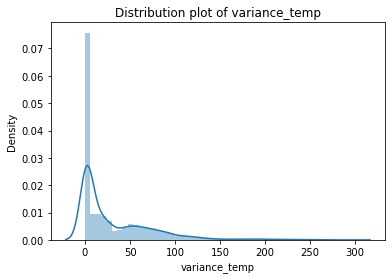

In [101]:
dist_plots(df_c, 'variance_temp')

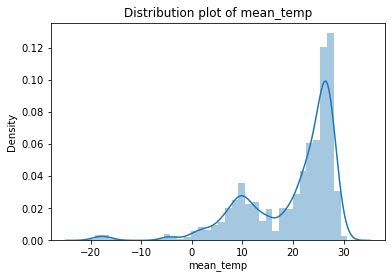

In [102]:
dist_plots(df_c, 'mean_temp')

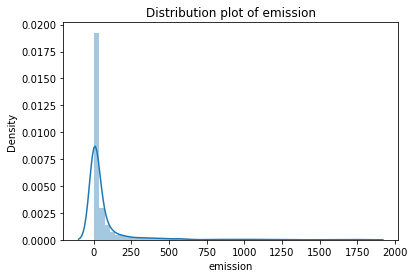

In [103]:
dist_plots(df_c, 'emission')

### Top 10 countries with high CO2 emission

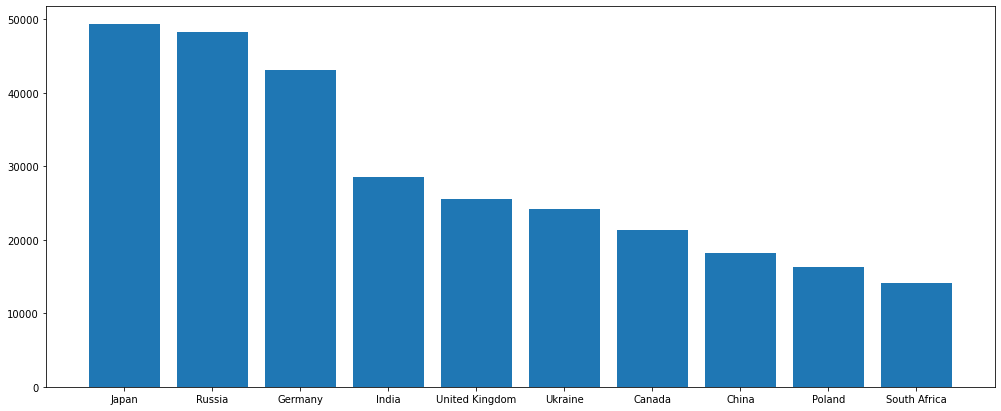

In [203]:
plt.figure(figsize = (17,7))
top_df_c = df_c.groupby('Country')['emission'].sum().reset_index()
top_10 = top_df_c.sort_values(by = 'emission', ascending = False)[0:10]
plt.bar(top_10['Country'], top_10['emission'])
plt.show()

## Correlation Analysis

<AxesSubplot:>

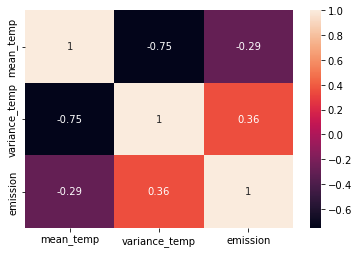

In [104]:
sns.heatmap(df_c[['mean_temp', 'variance_temp', 'emission']].corr(), annot = True)

## Regression Analysis

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def lin_reg(data, input_feat):
    x = data[input_feat].values.reshape(-1, 1)
    y = data['emission'].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)
    y_pred1 = regressor.predict(x)
   
    plt.scatter(x, y)
    plt.plot(x, y_pred1, color='red')
    plt.show()

Mean Squared Error: 34361.89423839837
R-squared: 0.10754243999960422


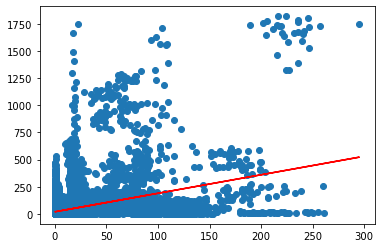

In [158]:
lin_reg(df_c, 'variance_temp')

Mean Squared Error: 35538.60317115427
R-squared: 0.07698059798728352


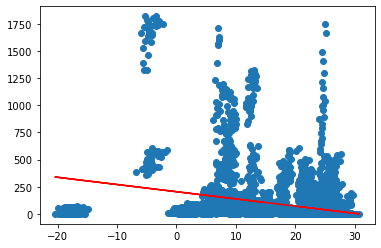

In [159]:
lin_reg(df_c, 'mean_temp')

## Time series analysis

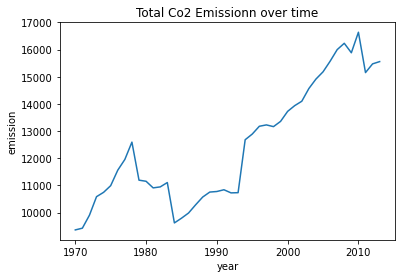

In [172]:
df_c.groupby('year')['emission'].sum().plot()
plt.title('Total Co2 Emission over time')
plt.ylabel('emission')
plt.show()

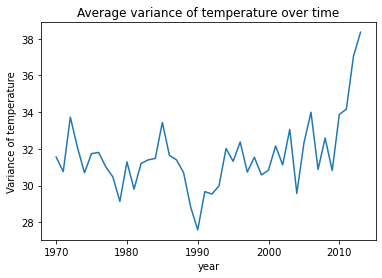

In [173]:
df_c.groupby('year')['variance_temp'].mean().plot()
plt.title('Average variance of temperature over time')
plt.ylabel('Variance of temperature')
plt.show()

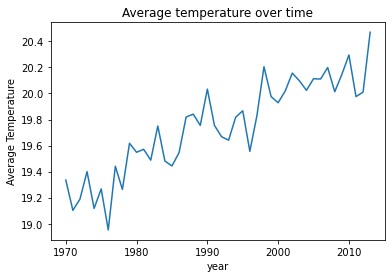

In [174]:
df_c.groupby('year')['mean_temp'].mean().plot()
plt.title('Average temperature over time')
plt.ylabel('Average Temperature')
plt.show()

In [65]:
df_c.to_csv('co2_data.csv')

## CO2 Emission Per Sector Analysis

In [205]:
# creating a copy of data
df_cs = co2_by_sector_df.copy()

#### Removing outliers

In [206]:
for i in num_feat:
  indeces_cs = []                                              # creating a empty list
  x = df_cs[i]
  mean = df_cs[i].mean()
  std = df_cs[i].std()
  index = df_cs[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces_cs.append(index)

In [207]:
df_cs.drop(list(indeces_cs)[0] , inplace = True)

#### Average emissions per sector

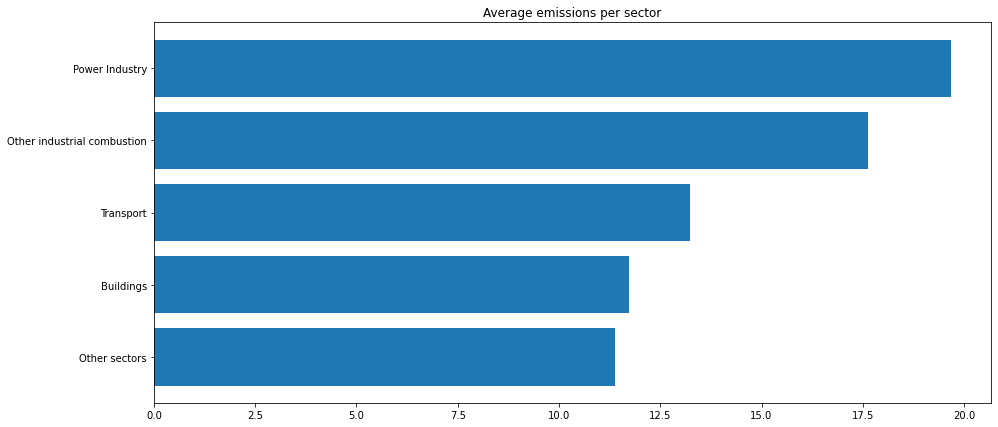

In [232]:
sec = df_cs.groupby('Sector')['emission'].mean().sort_values().reset_index()
plt.figure(figsize = (15,7))
plt.barh(sec['Sector'], sec['emission'])
plt.title('Average emissions per sector')
plt.show()

## CO2 emissions per captia analysis

In [233]:
co2_per_captia_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,0.154430
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,2.238236
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,1.301139
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,1.321143
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.338637


In [234]:
df_cp = co2_per_captia_df.copy()

#### Removing outliers

In [235]:
for i in num_feat:
  indeces_cp = []                                              # creating a empty list
  x = df_cp[i]
  mean = df_cp[i].mean()
  std = df_cp[i].std()
  index = df_cp[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces_cp.append(index)

In [237]:
df_cp.drop(list(indeces_cp)[0] , inplace = True)

#### Top 10 countries with high emissions per captia

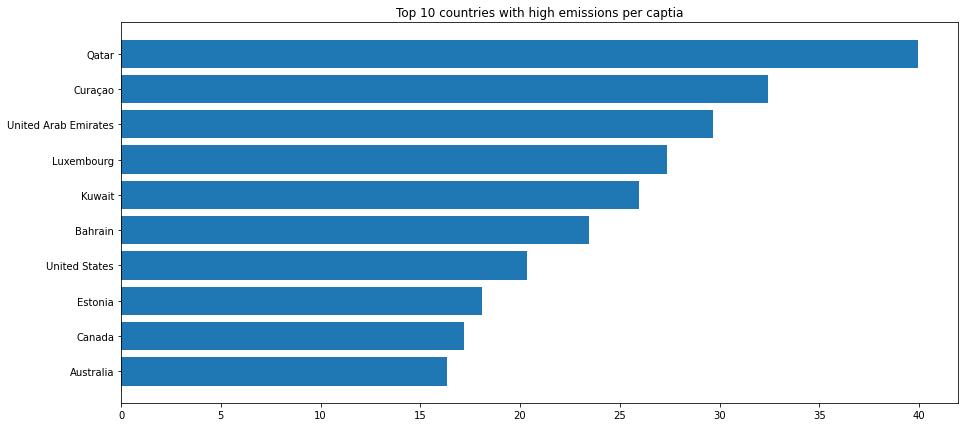

In [262]:
per_captia = df_cp.groupby('Country')['emission'].mean().reset_index().sort_values(by = 'emission', ascending = False)[0:10]
plt.figure(figsize = (15,7))
plt.barh(per_captia['Country'][::-1], per_captia['emission'][::-1])
plt.title('Top 10 countries with high emissions per captia')
plt.show()

#### Correlation between CO2 emissions per captia and temperature variables

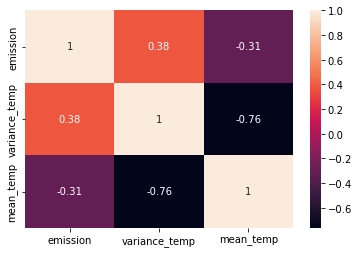

In [267]:
sns.heatmap(df_cp[['emission', 'variance_temp', 'mean_temp']].corr(), annot = True)
plt.show()

## Total Green House Gases emission analysis

In [328]:
ghg_df = ghg_total_df.copy()

In [329]:
ghg_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,16.269661
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,7.942808
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,51.542009
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,18.985437
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.004399


#### Removing outliers

In [330]:
def desc_stats(data, feature):
    df = data[feature].describe()
    print(f'Descriptive Statistics of {feature}')
    return df.reset_index()
    

In [331]:
def dist_plots(data, feature):
    sns.distplot(data[feature])
    plt.title(f'Distribution plot of {feature}')
    plt.show()

In [332]:
desc_stats(ghg_df, 'variance_temp')

Descriptive Statistics of variance_temp


,index,variance_temp
0,count,7568.000000
1,mean,32.558229
2,std,43.455190
3,min,0.022092
4,25%,1.406749
5,50%,12.238186
6,75%,54.361413
7,max,295.247774


In [333]:
desc_stats(ghg_df, 'mean_temp')

Descriptive Statistics of mean_temp


,index,mean_temp
0,count,7568.000000
1,mean,19.589351
2,std,9.045649
3,min,-20.446833
4,25%,12.709062
5,50%,23.384396
6,75%,26.508250
7,max,30.744750


In [334]:
desc_stats(ghg_df, 'emission')

Descriptive Statistics of emission


,index,emission
0,count,7568.000000
1,mean,181.221937
2,std,719.249990
3,min,0.003847
4,25%,4.943478
5,50%,22.674108
6,75%,86.397379
7,max,13222.846036


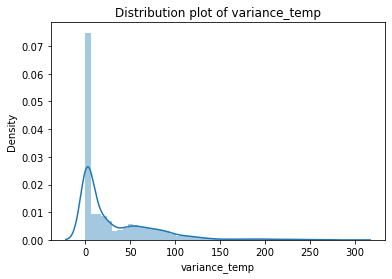

In [335]:
dist_plots(ghg_df, 'variance_temp')

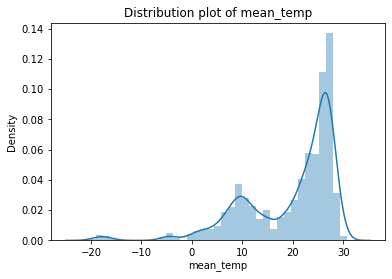

In [336]:
dist_plots(ghg_df, 'mean_temp')

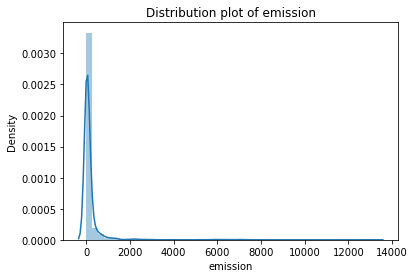

In [337]:
dist_plots(ghg_df, 'emission')

### Top 10 countries with high Green House Gases emissions

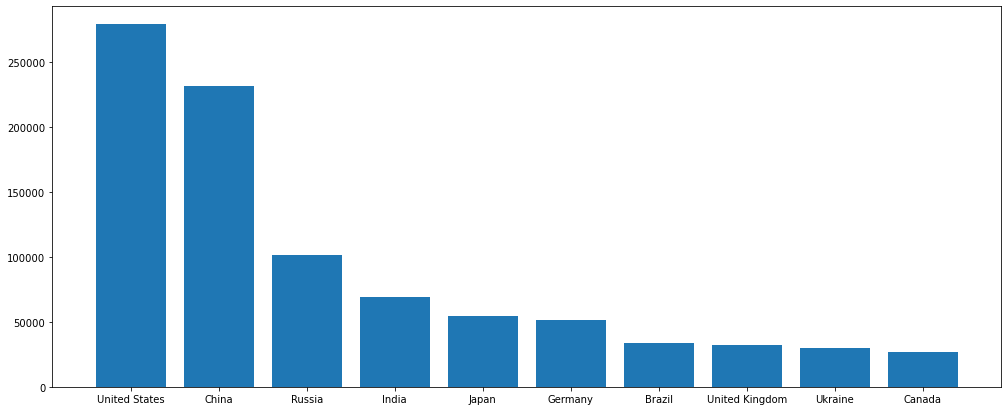

In [339]:
plt.figure(figsize = (17,7))
top_df_g = ghg_df.groupby('Country')['emission'].sum().reset_index()
top_10_g = top_df_g.sort_values(by = 'emission', ascending = False)[0:10]
plt.bar(top_10_g['Country'], top_10_g['emission'])
plt.show()

## Correlation Analysis

<AxesSubplot:>

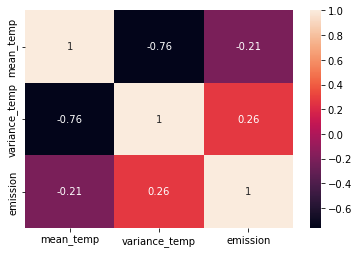

In [340]:
sns.heatmap(ghg_df[['mean_temp', 'variance_temp', 'emission']].corr(), annot = True)

## Regression Analysis

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def lin_reg(data, input_feat):
    x = data[input_feat].values.reshape(-1, 1)
    y = data['emission'].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)
    y_pred1 = regressor.predict(x)
   
    plt.scatter(x, y)
    plt.plot(x, y_pred1, color='red')
    plt.show()

Mean Squared Error: 365326.92547140154
R-squared: 0.0815508951389412


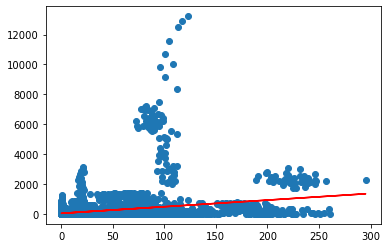

In [342]:
lin_reg(ghg_df, 'variance_temp')

Mean Squared Error: 379627.3876834972
R-squared: 0.04559885929912222


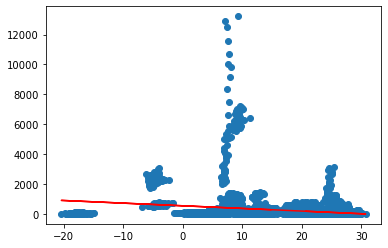

In [343]:
lin_reg(ghg_df, 'mean_temp')

## Time series analysis

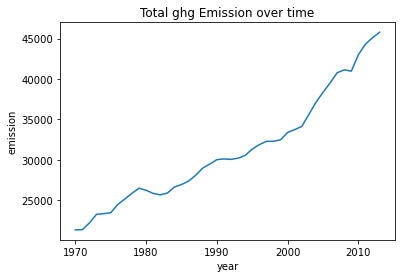

In [344]:
ghg_df.groupby('year')['emission'].sum().plot()
plt.title('Total ghg Emission over time')
plt.ylabel('emission')
plt.show()

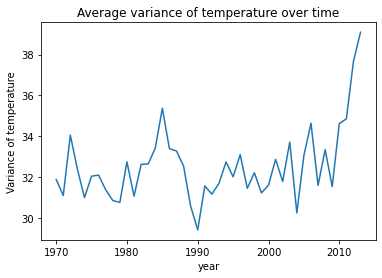

In [345]:
ghg_df.groupby('year')['variance_temp'].mean().plot()
plt.title('Average variance of temperature over time')
plt.ylabel('Variance of temperature')
plt.show()

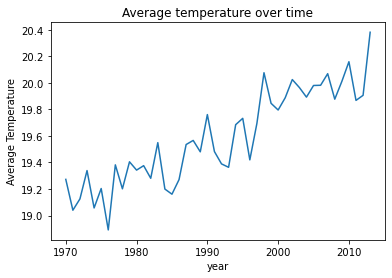

In [346]:
ghg_df.groupby('year')['mean_temp'].mean().plot()
plt.title('Average temperature over time')
plt.ylabel('Average Temperature')
plt.show()

## Total Green House Gases Emission per sector Analysis

In [347]:
ghg_s = ghg_per_sec_df.copy()

#### Average emissions per sector

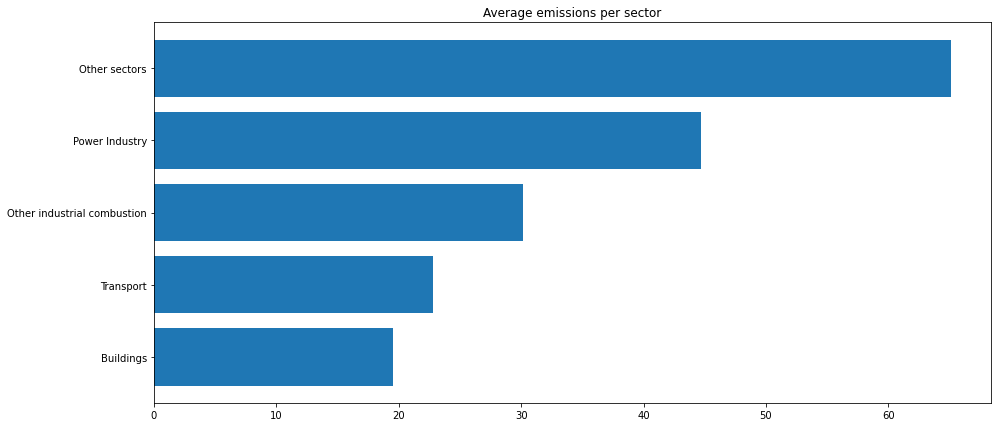

In [348]:
sec = ghg_s.groupby('Sector')['emission'].mean().sort_values().reset_index()
plt.figure(figsize = (15,7))
plt.barh(sec['Sector'], sec['emission'])
plt.title('Average emissions per sector')
plt.show()

## GHG emissions per captia analysis

In [349]:
ghg_per_captia_df.head()

,year,Country,mean_temp,median_temp,max_temp,min,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.462297
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,3.693299
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,3.542406
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,2.801708
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.686986


In [350]:
ghg_cp = ghg_per_captia_df.copy()

#### Top 10 countries with high ghg emissions per captia

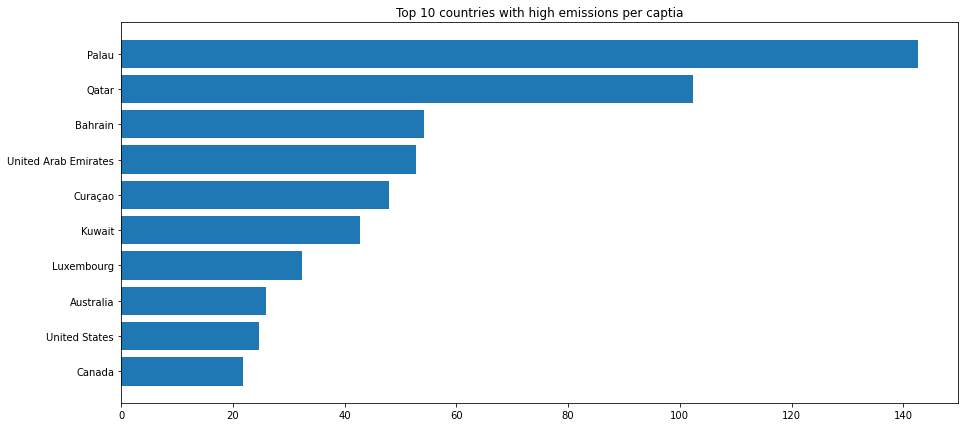

In [351]:
per_captia = ghg_cp.groupby('Country')['emission'].mean().reset_index().sort_values(by = 'emission', ascending = False)[0:10]
plt.figure(figsize = (15,7))
plt.barh(per_captia['Country'][::-1], per_captia['emission'][::-1])
plt.title('Top 10 countries with high emissions per captia')
plt.show()

#### Correlation between CO2 emissions per captia and temperature variables

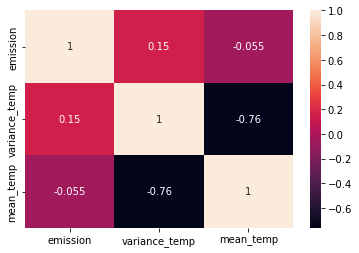

In [352]:
sns.heatmap(ghg_cp[['emission', 'variance_temp', 'mean_temp']].corr(), annot = True)
plt.show()